<h1 align = 'center'><font size="10" >Technical Analysis</font></h1>

<h2 align = "center">Technical analysis is an analysis methodology for forecasting the direction of prices through the study of past market data.</h2>

<font size = '3.5'>In this presentation you will learn about traditional technical indicators and japanese candlesticks which are used to predict stock prices. Traditional indicators are analytical tools which work greatly when stocks have long trends. They give insight on how the price will change but if they are used seperately they are not effective as you may recieve false signals for a trend change. Japanese candlesticks are charts of stocks with high, low open and close values in it. Candlesticks are used to find some patterns which have proven to be strong indicators of trend changes. They are purely psychological indicators, as each pattern has it's explaination of how the traders will behave. Nowadays traders usually combine these techniques to recieve maximum efficiency on thier predictions.</font>

<font size = '3'>I have downloaded "Apple" stock data from Google Finance and some modifications to the dataset. All the subsequent graphs are done on "Apple" stock prices.</font>

In [55]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from __future__ import division

In [2]:
apple = pdr.DataReader('AAPL','google')

In [3]:
ind=list(range(len(apple)))
apple['index']=pd.Series(ind, index = apple.index)
max_length = len(apple['Close'])

<font size = "4">One of the most popular indicators is MACD (Moving Average Convergence Divergence). As name suggests it is based on moving averages. Usually exponential moving averages are used. It is the difference beetween fast moving average (usually 12 days) and slow moving average (usually 26 days).</font>

Here is defined exponentially smoothed moving average.
<br>x is count for days.
<br>a is starting point.
<br>b is end point.
<br>alpha is smoothing factor.

In [4]:
def EMA(x,a,b,alpha):
    ema_list = []
    for k in range(b-a-x):
        price = apple["Close"][a+x+k]
        price_alpha = 1
        for i in range(x):
            price=price+apple["Close"][a+x+k-i-1]*alpha**(i+1)
            price_alpha=price_alpha+alpha**(i+1)
        avg = price/price_alpha
        ema_list.append(avg)
    return(ema_list)

Here is defined exponential moving average. 
<br>x is count for days for fast MA. 
<br>y is count for days for slow MA. 
<br>a is starting point. 
<br>b is end point. 
<br>alpha is smoothing factor.

In [5]:
def rMACD(x,y,a,b,alpha):
    first = EMA(x,a+y-x,b,alpha)
    second = EMA(y,a,b,alpha)
    mac = []
    for i in range(len(first)):
        mac.append(first[i]-second[i])
    return(mac)
        

In [6]:
def plot_MACD(x,y,a,b,alpha):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 17
    fig_size[1] = 5
    plt.rcParams["figure.figsize"] = fig_size
    plt.axhline(y=0, color='r')
    plt.plot(rMACD(x,y,a,b,alpha),'b')
    plt.show()

<font size ="3">Here is the plot of MACD. While it's above 0 it means fast MA is greater then slow MA which means prices are on uptrend. While it's below 0 prices are on downtrend. It is one of the rules to change position in stock market when MACD crosses 0 line. As can be seen from the graph there is a point where MACD goes below 0 and then backs up which is a false signal to change the position.<font>

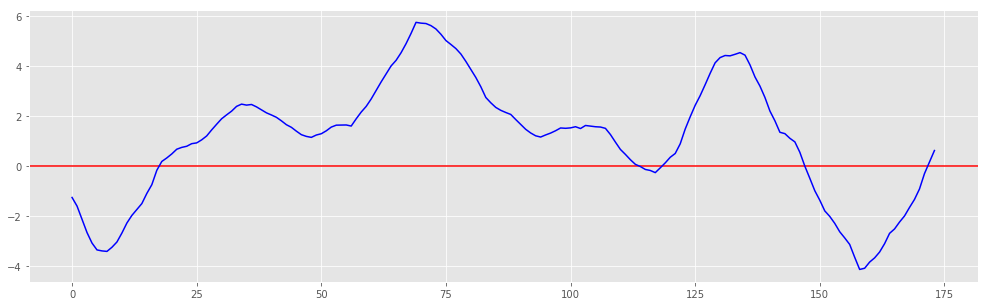

In [7]:
plot_MACD(12,26,max_length-200,max_length,0.99)

<font size="3">MACD is also lagged indicator. It shows the trend change after a few days it happens, so another indicator has been developed to overcome that problem. The indicator is created by generating exponential MA on MACD ( SO it's EMA on EMA of prices). Ussually it's 9 days MA.</font>

In [8]:
def macdema(x,y,z,a,b,alpha):
    mac = rMACD(x,y,a,b,alpha)
    ema_list = []
    for k in range(b-a-y):
        price = mac[k]
        price_alpha = 1
        for i in range(z):
            price=price+mac[k-i-1]*alpha**(i+1)
            price_alpha=price_alpha+alpha**(i+1)
        avg = price/price_alpha
        ema_list.append(avg)
    return(ema_list)

In [9]:
def plot_all_mac(x,y,z,a,b,alpha):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 17
    fig_size[1] = 5
    mac_diff = []
    rmac = rMACD(x,y,a,b,alpha)
    emac = macdema(x,y,z,a,b,alpha)
    for i in range(len(rmac)):
        mac_diff.append(rmac[i]-emac[i])
    
    plt.rcParams["figure.figsize"] = fig_size
    plt.axhline(y=0, color='black')
    plt.plot(rmac,'b')
    plt.plot(emac,'green')
    plt.bar(range(b-a-y), mac_diff, width = 1/1.1, color="grey")
    #plt.show()

<font size  = "3">The blue line is MACD and green is EMA on MACD. When EMA crosses MACD it's an indicator to change the position. However, if after the cross MACD doesn't cross the 0 line befor the next EMA and MACD cross it means we have recieved a false signal. This indicators happens more often then previous one , but it is more unrelieable.</font> 

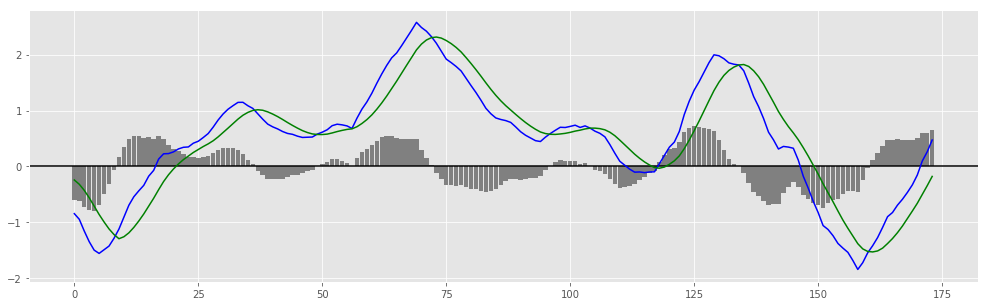

In [10]:
plot_all_mac(12,26,9,max_length-200,max_length,0.9)
plt.show()

In [11]:
def plot_MACD_analysis(x,y,z,a,b,alpha):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 17
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(EMA(x,a,b-y+x,alpha),'b')
    plt.plot(EMA(y,a,b,alpha),'r')
    closed = []
    for i in range(b-a-y):
        closed.append(apple["Close"][a+y+i])
    plt.plot(closed,'black',linewidth = 2)
    #plt.show()
    #plot_all_mac(x,y,z,a,b,alpha)

<font size = "3">Here are the 2 graphs which are used together to make all predictions through MACD indicator.</font>
<br>The black line on 1st graph is the Close price.
<br>The blue line on 1st graph is the fast EMA.
<br>The red line on 1st graph is the slow EMA.
<br>The blue line on 2nd graph is MACD.
<br>The green line on 2nd graph is EMA on MACD.
<br>The histogram is the differenc beetween MACD and EMA on MACD

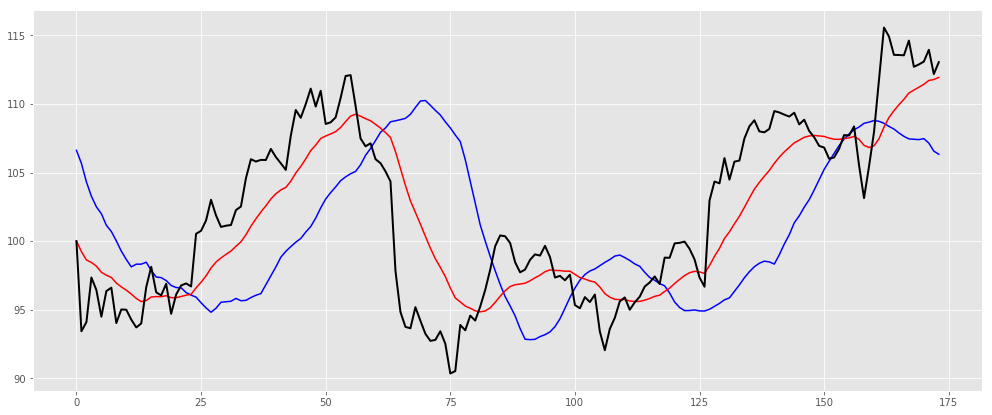

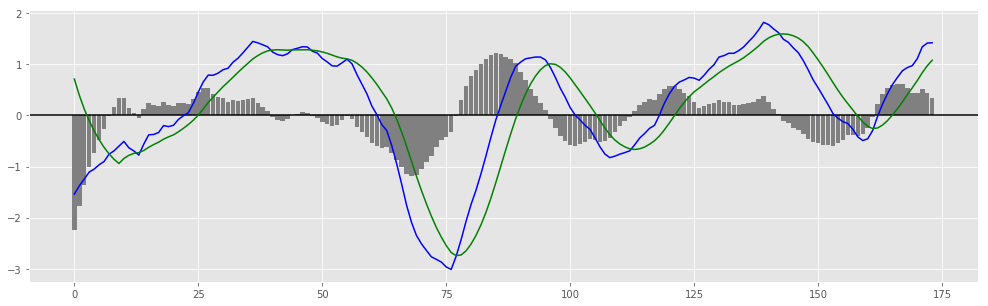

In [12]:
plot_MACD_analysis(12,26,9,max_length-400,max_length-200,0.9)
plt.show()
plot_all_mac(12,26,9,max_length-400,max_length-200,0.9)
plt.show()

<font size = "3">EMA and MACD crossing (when not giving false signals) are right on trend change spot while MACD is lagged for a few days. The histogram is used to track the difference of EMA and MACD to be prepared to change positions.</font>

<font size = '3'>There is also 3 indicator which happens rarely but is the most reliable out of 3 discussed indicators. When the peak prices are on uptrend(downtrend) and MACD peaks are on downtrend(uptrend) it signals a trend change as the stock will supposedly be overbought(oversold).</font> 

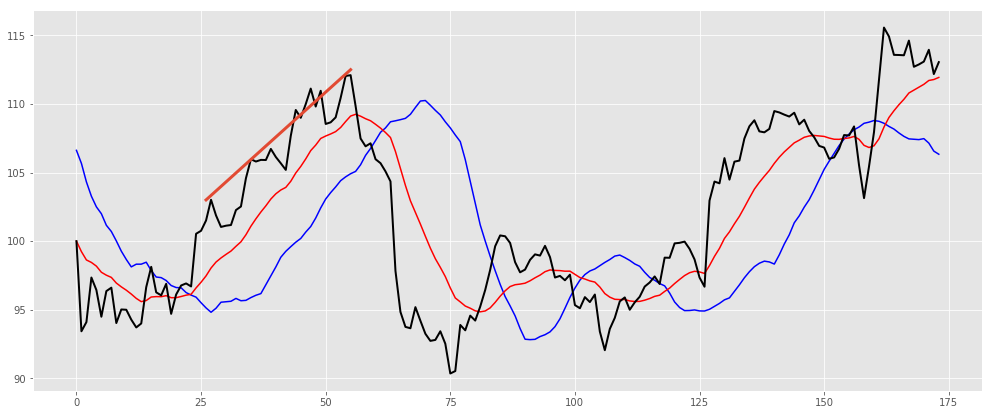

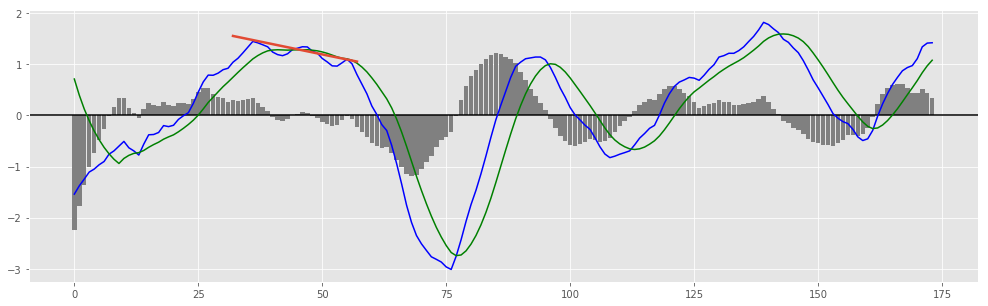

In [13]:
plot_MACD_analysis(12,26,9,max_length-400,max_length-200,0.9)
plt.plot([26,55],[103,112.5],linewidth = 3)
plt.show()
plot_all_mac(12,26,9,max_length-400,max_length-200,0.9)
plt.plot([32,57],[1.55,1.05],linewidth = 2.5)
plt.show()

<font size = "3">According to the indicator there should be a trend change. As seen in the graph there is a rapid trend change.</font>

<font size = "3">Another popular indicator is RSI (Realtive Strength Index) Which is used to identify if stock is overbought or oversold. It is composed of EMAs (usually modified MA is used but EMA is also used), which are caluclated on positive and negative stock price changes.</font>

In [32]:
def splus(x):
    if x> 0:
        return(x)
    else:
        return(0)
def sminus(x):
    if x< 0:
        return(-x)
    else:
        return(0)

In [57]:
def uEMA_diff(x,a,b,alpha):
    ema_list = []
    for k in range(b-a-x):
        price = splus(apple["Close"][a+x+k]-apple["Close"][a+x+k-1])
        price_alpha = 1
        for i in range(x):
            price=price+splus((apple["Close"][a+x+k-i-1]-apple["Close"][a+x+k-i-2]))*alpha**(i+1)
            price_alpha=price_alpha+alpha**(i+1)
        avg = price/price_alpha
        ema_list.append(avg)
    return(ema_list)

In [58]:
def dEMA_diff(x,a,b,alpha):
    ema_list = []
    for k in range(b-a-x):
        price = sminus(apple["Close"][a+x+k]-apple["Close"][a+x+k-1])
        price_alpha = 1
        for i in range(x):
            price=price+sminus(apple["Close"][a+x+k-i-1]-apple["Close"][a+x+k-i-2])*alpha**(i+1)
            price_alpha=price_alpha+alpha**(i+1)
            #print price
        avg = price/price_alpha
        ema_list.append(avg)
    return(ema_list)

In [59]:
def RSI(x,a,b,alpha):
    rsi_list = []
    u = uEMA_diff(x,a,b,alpha)
    d = dEMA_diff(x,a,b,alpha)
    for i in range(len(u)):
        rsi_list.append(100-100/(1+u[i]/d[i]))
    return(rsi_list)
        

In [80]:
def RSI_plot(x,a,b,alpha):
    rsi = RSI(x,a,b,alpha)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 17
    fig_size[1] = 5
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(rsi,'r')

In [81]:
def stock_plot(x,a,b):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 17
    fig_size[1] = 7
    plt.rcParams["figure.figsize"] = fig_size
    closed = []
    for i in range(b-a-x):
        closed.append(apple["Close"][a+x+i])
    plt.plot(closed,'black',linewidth = 2)

<font size = "3">Overbought and oversold thresholds are usually 70 and 30 correspondingly</font>

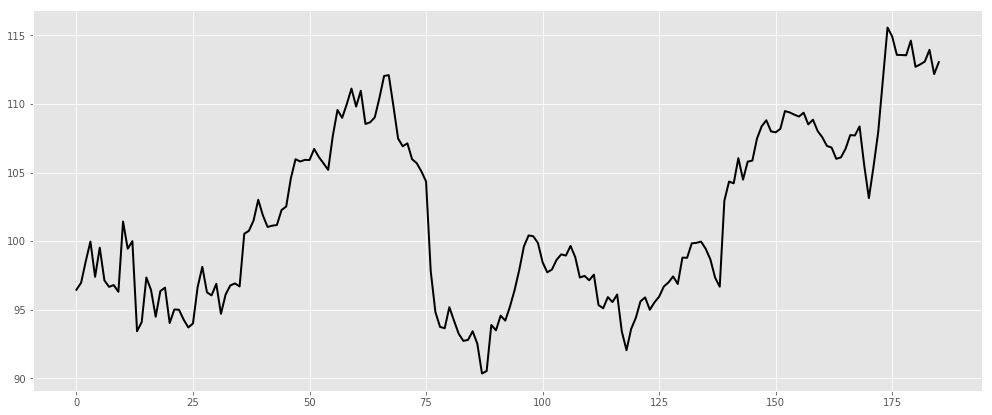

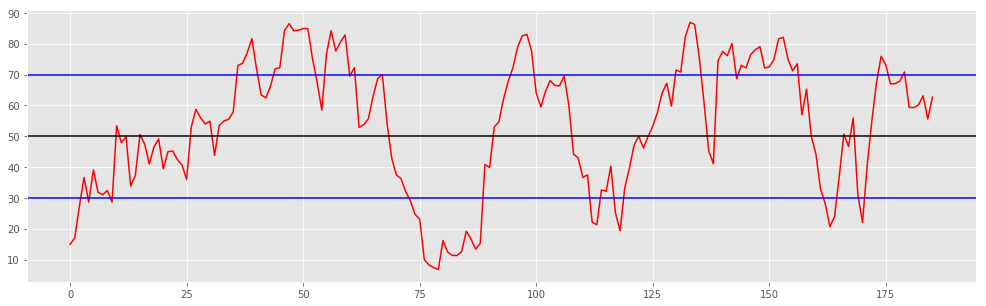

In [87]:
stock_plot(14,max_length-400,max_length-200)
plt.show()
RSI_plot(14,max_length-400,max_length-200,0.9)
plt.axhline(y=50, color='black')
plt.axhline(y=70, color='b')
plt.axhline(y=30, color='b')
plt.show()

<font size = "3">There is also TSI (True Strength Index) which is used to identify not only overbuying and overselling but also trends. It is constructed of double EMAs of price differences.The overbought and oversold identifying is similar to RSI. If TSI is increasing(decreasing) stock is on uptrend(downtrend).</font>

In [108]:
def EMA_diff(x,a,b,alpha):
    ema_list = []
    for k in range(b-a-x):
        price = apple["Close"][a+x+k]-apple["Close"][a+x+k-1]
        price_alpha = 1
        for i in range(x):
            price=price+(apple["Close"][a+x+k-i-1]-apple["Close"][a+x+k-i-2])*alpha**(i+1)
            price_alpha=price_alpha+alpha**(i+1)
        avg = price/price_alpha
        ema_list.append(avg)
    return(ema_list)

In [88]:
def absEMA_diff(x,a,b,alpha):
    ema_list = []
    for k in range(b-a-x):
        price = abs(apple["Close"][a+x+k]-apple["Close"][a+x+k-1])
        price_alpha = 1
        for i in range(x):
            price=price+abs(apple["Close"][a+x+k-i-1]-apple["Close"][a+x+k-i-2])*alpha**(i+1)
            price_alpha=price_alpha+alpha**(i+1)
        avg = price/price_alpha
        ema_list.append(avg)
    return(ema_list)

In [103]:
def TSI(x,y,a,b,alpha,beta):
    noabs = EMA_diff(x,a,b-y+x,alpha)
    yesabs = absEMA_diff(x,a,b-y+x,alpha)
    tsi_list = []
    ema_list_noabs = []
    for k in range(b-a-y):
        price = noabs[k]
        price_beta = 1
        for i in range(y):
            price=price+noabs[k-i-1]*beta**(i+1)
            price_alpha=price_beta+beta**(i+1)
        avg = price/price_beta
        ema_list_noabs.append(avg)
    ema_list_yesabs = []
    for k in range(b-a-y):
        price = yesabs[k]
        price_beta = 1
        for i in range(y):
            price=price+yesabs[k-i-1]*beta**(i+1)
            price_alpha=price_beta+beta**(i+1)
        avg = price/price_beta
        ema_list_yesabs.append(avg)
    for i in range(len(ema_list_noabs)):
        tsi_list.append(100*ema_list_noabs[i]/ema_list_yesabs[i])
    return(tsi_list)
        

In [111]:
def TSI_plot(x,y,a,b,alpha,beta):
    tsi = TSI(x,y,a,b,alpha,beta)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 17
    fig_size[1] = 5
    plt.rcParams["figure.figsize"] = fig_size
    plt.plot(tsi,'r')

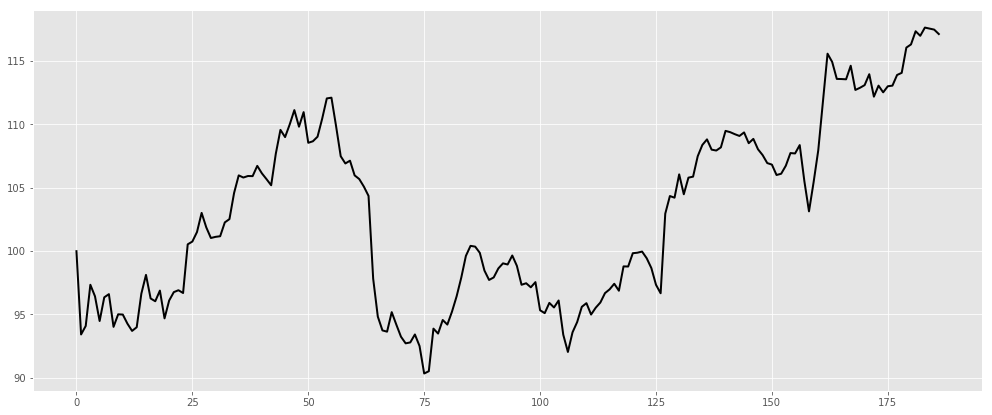

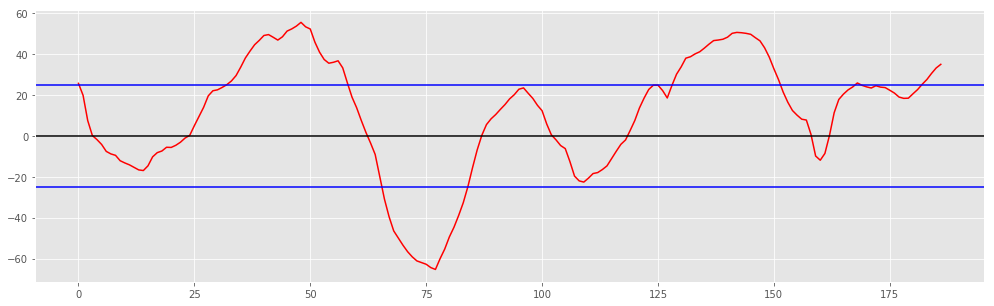

In [117]:
stock_plot(13,max_length-400+13,max_length-200+13)
plt.show()
TSI_plot(25,13,max_length-400,max_length-200,0.9,0.9)
plt.axhline(y=0, color='black')
plt.axhline(y=25, color='b')
plt.axhline(y=-25, color='b')
plt.show()

In [ ]:
def apple_graph(x,y):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 2*(y-x)/5
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    for i in tqdm(range(len(apple[x:y]))):
        plt.plot([apple['index'][i],apple['index'][i]],[apple['High'][x+i-1],apple['Low'][x+i-1]], 'black',linewidth=2.0)
        if apple['Open'][x+i-1]<apple['Close'][x+i-1]:
            plt.plot([apple['index'][i],apple['index'][i]],[apple['Open'][x+i-1],apple['Close'][x+i-1]], 'b',linewidth=10.0)
        elif apple['Open'][x+i-1]==apple['Close'][x+i-1]:
            plt.plot(apple['index'][i],apple['Open'][x+i-1], 'gs',linewidth=10.0)
        else:
            plt.plot([apple['index'][i],apple['index'][i]],[apple['Open'][x+i-1],apple['Close'][x+i-1]], 'r',linewidth=10.0)
    plt.show()

In [ ]:
def apple_graph_median(x,y):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 2*(y-x)/5
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    median=[]
    for i in tqdm(range(len(apple[x:y]))):
        median.append(0.4*(apple['Open'][x+i-1]+apple['Close'][x+i-1])+0.1*(apple['High'][x+i-1]+apple['Low'][x+i-1]))
        plt.plot([apple['index'][i],apple['index'][i]],[apple['High'][x+i-1],apple['Low'][x+i-1]], 'grey',linewidth=2.0)
        plt.plot(apple['index'][i],median[i],'black',linewidth=10.0)
        if apple['Open'][x+i-1]<apple['Close'][x+i-1]:
            plt.plot([apple['index'][i],apple['index'][i]],[apple['Open'][x+i-1],apple['Close'][x+i-1]], 'b',linewidth=10.0)
        elif apple['Open'][x+i-1]==apple['Close'][x+i-1]:
            plt.plot(apple['index'][i],apple['Open'][x+i-1], 'gs',linewidth=10.0)
        else:
            plt.plot([apple['index'][i],apple['index'][i]],[apple['Open'][x+i-1],apple['Close'][x+i-1]], 'r',linewidth=10.0)
    plt.plot(apple['index'][0:len(apple[x:y])],median,'black',linewidth=3.0)
    plt.show()